In [1]:
import numpy as np
from PIL import ImageFont
from generate_char_palette import *
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
FONT = ImageFont.truetype("fonts/CascadiaMono.ttf", 32)
WINDOW_SIZE = (1,2)

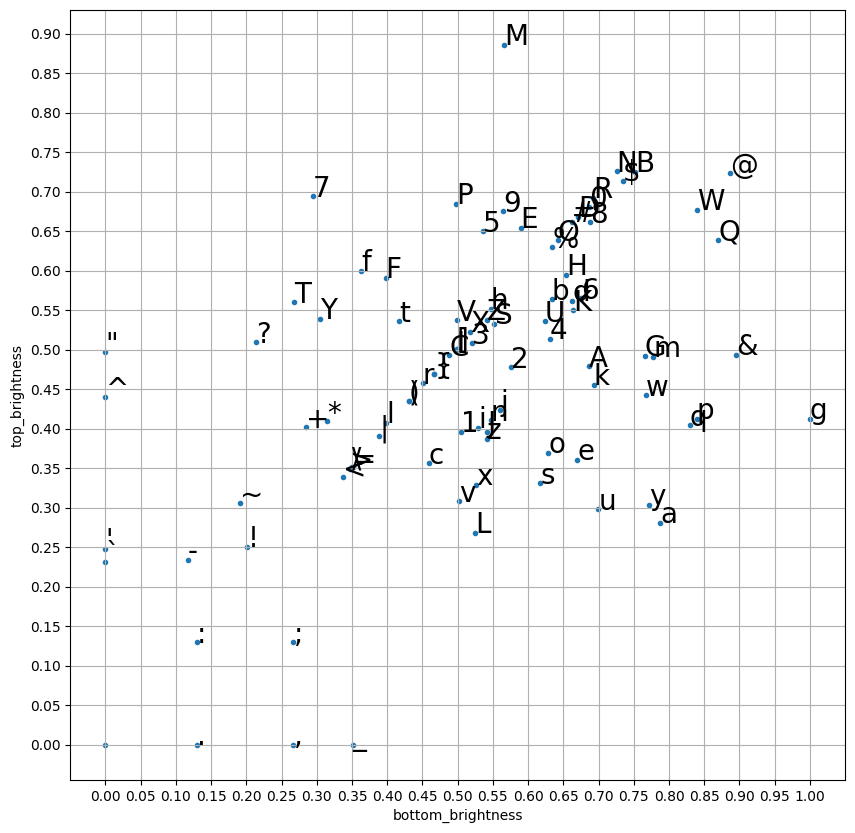

In [3]:
asciis = get_asciis()

brightness_map = generate_brightness_map(asciis, FONT, WINDOW_SIZE, normalize=True)
brightness = list(brightness_map.values())
top_brightness = [b[0][0] for b in brightness]
bottom_brightness = [b[1][0] for b in brightness]
plt.figure(figsize=(10, 10))
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness) + 0.05, 0.05))
plt.yticks(np.arange(min(top_brightness), max(top_brightness) + 0.05, 0.05))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(asciis)):
    plt.annotate(asciis[i], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [4]:
char_to_brightness = {c: (b, np.mean(b)) for c, b in zip(asciis, brightness) }

In [5]:
x_bins = 9
y_bins = 9

char_bins = [[[] for _ in range(x_bins)] for _ in range(y_bins)]

br_max = max_brightness_per_pos(brightness)
br_y_step = br_max[0][0] / (y_bins-1)
br_x_step = br_max[1][0] / (x_bins-1)
for char, char_br in zip(asciis, brightness):
    bin_y_index = int(round(char_br[0][0] / br_y_step))
    bin_x_index = int(round(char_br[1][0] / br_x_step))
    char_bins[bin_y_index][bin_x_index].append(char)

for row in char_bins:
    print(row)

[[' '], ['.'], [','], ['_'], [], [], [], [], []]
[[], [':'], [';'], [], [], [], [], [], []]
[["'", '`'], ['-'], ['!'], [], ['L'], [], [], [], []]
[[], [], ['~'], ['/', '<', '=', '>', '\\'], ['c', 'v', 'x', 'z'], ['e', 'o', 's'], ['a', 'u', 'y'], [], []]
[['"', '^'], [], ['+'], ['l', '(', ')', '*', '|'], ['1', 'i', 'j', 'n', 'r', 'C', 'I', 'J', '{', '}'], ['2', 'A'], ['k', 'm', 'w', 'G'], ['p', 'q', '&'], ['g']]
[[], [], ['T', 'Y', '?'], ['f', 't', 'F'], ['3', 'h', 'S', 'V', 'X', 'Z', '[', ']'], ['4', '6', 'b', 'd', 'H', 'K', 'U'], [], [], []]
[[], [], ['7'], [], ['5', 'P'], ['0', '9', 'D', 'E', 'O', '#', '%'], ['8', 'R', '$'], ['Q', 'W'], []]
[[], [], [], [], [], [], ['B', 'N'], ['@'], []]
[[], [], [], [], [], ['M'], [], [], []]


In [6]:
def splice_cell(top, left):
    if len(top) > 0:
        res = top[0]
    else:
        res = left[0]
    for a in top:
        if (char_to_brightness[res][1] < char_to_brightness[a][1]):
            res = a

    for a in left:
        if (char_to_brightness[res][1] < char_to_brightness[a][1]):
            res = a
    return res


for y in range(y_bins):
    for x in range(x_bins):
        if len(char_bins[y][x]) == 0:
            if x > 0 and y > 0:
                char_bins[y][x].append(splice_cell(char_bins[y-1][x], char_bins[y][x-1]))
            elif x > 0:
                char_bins[y][x].append(splice_cell([], char_bins[y][x-1]))
            elif y > 0:
                char_bins[y][x].append(splice_cell(char_bins[y-1][x], []))

In [7]:
for row in char_bins:
    print(row)

[[' '], ['.'], [','], ['_'], ['_'], ['_'], ['_'], ['_'], ['_']]
[[' '], [':'], [';'], [';'], [';'], [';'], [';'], [';'], [';']]
[["'", '`'], ['-'], ['!'], ['!'], ['L'], ['L'], ['L'], ['L'], ['L']]
[["'"], ['-'], ['~'], ['/', '<', '=', '>', '\\'], ['c', 'v', 'x', 'z'], ['e', 'o', 's'], ['a', 'u', 'y'], ['y'], ['y']]
[['"', '^'], ['"'], ['+'], ['l', '(', ')', '*', '|'], ['1', 'i', 'j', 'n', 'r', 'C', 'I', 'J', '{', '}'], ['2', 'A'], ['k', 'm', 'w', 'G'], ['p', 'q', '&'], ['g']]
[['"'], ['"'], ['T', 'Y', '?'], ['f', 't', 'F'], ['3', 'h', 'S', 'V', 'X', 'Z', '[', ']'], ['4', '6', 'b', 'd', 'H', 'K', 'U'], ['m'], ['&'], ['g']]
[['"'], ['"'], ['7'], ['7'], ['5', 'P'], ['0', '9', 'D', 'E', 'O', '#', '%'], ['8', 'R', '$'], ['Q', 'W'], ['W']]
[['"'], ['"'], ['7'], ['7'], ['5'], ['0'], ['B', 'N'], ['@'], ['@']]
[['"'], ['"'], ['7'], ['7'], ['5'], ['M'], ['B'], ['@'], ['@']]


In [8]:
palette = []
for row in char_bins:
    palette.append([])
    for col in row:
        c = col[len(col)//2]
        palette[-1].append(c)
    print(palette[-1])

[' ', '.', ',', '_', '_', '_', '_', '_', '_']
[' ', ':', ';', ';', ';', ';', ';', ';', ';']
['`', '-', '!', '!', 'L', 'L', 'L', 'L', 'L']
["'", '-', '~', '=', 'x', 'o', 'u', 'y', 'y']
['^', '"', '+', ')', 'C', 'A', 'w', 'q', 'g']
['"', '"', 'Y', 't', 'X', 'd', 'm', '&', 'g']
['"', '"', '7', '7', 'P', 'E', 'R', 'W', 'W']
['"', '"', '7', '7', '5', '0', 'N', '@', '@']
['"', '"', '7', '7', '5', 'M', 'B', '@', '@']


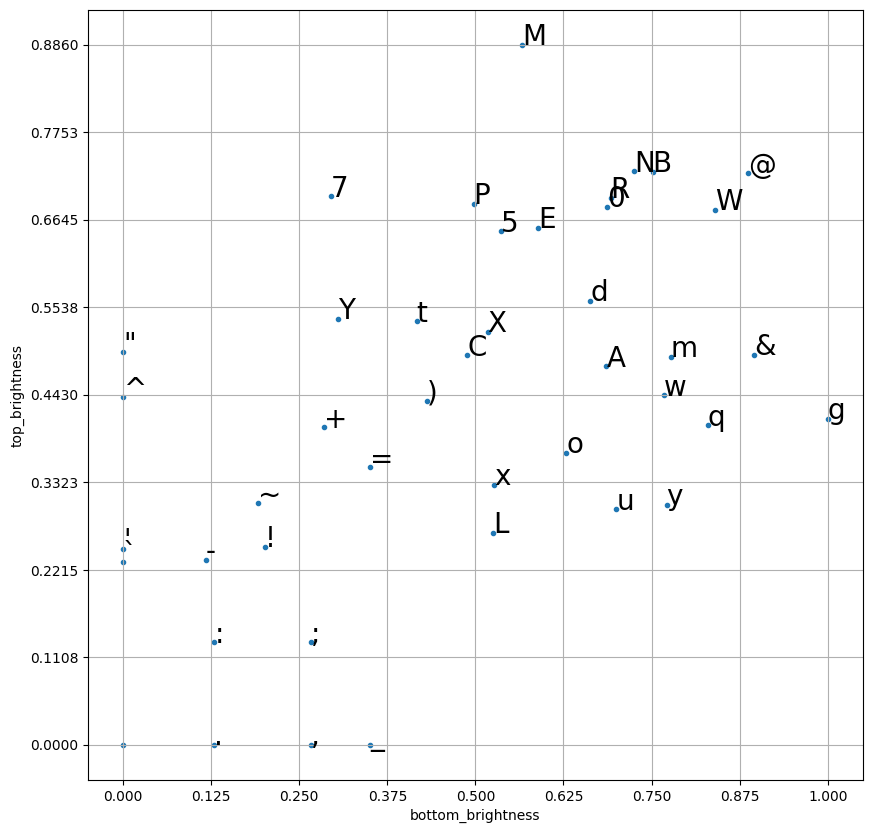

In [9]:
palette_chars = np.unique(palette)

brightness_map = generate_brightness_map(palette_chars, FONT, WINDOW_SIZE, normalize=True)
brightness = brightness_map.values()
top_brightness = [b[0][0] for b in brightness]
bottom_brightness = [b[1][0] for b in brightness]
plt.figure(figsize=(10, 10))
plt.scatter(bottom_brightness, top_brightness, marker='.')
plt.xticks(np.arange(min(bottom_brightness), max(bottom_brightness) + br_x_step, br_x_step))
plt.yticks(np.arange(min(top_brightness), max(top_brightness) + br_y_step, br_y_step))
plt.xlabel("bottom_brightness")
plt.ylabel("top_brightness")
for i in range(len(palette_chars)):
    plt.annotate(palette_chars[i], (bottom_brightness[i], top_brightness[i]), size=20)
plt.grid()

In [10]:
char_bins, bins_br = generate_1_2_palette(get_asciis(), FONT, (9,9))

for row in char_bins:
    print(row)
    
for row in bins_br:
    print(row)

[[' '], ['.'], [','], ['_'], ['_'], ['_'], ['_'], ['_'], ['_']]
[[' '], [':'], [';'], [';'], [';'], [';'], [';'], [';'], [';']]
[["'", '`'], ['-'], ['!'], ['!'], ['L'], ['L'], ['L'], ['L'], ['L']]
[["'"], ['-'], ['~'], ['/', '<', '=', '>', '\\'], ['c', 'v', 'x', 'z'], ['e', 'o', 's'], ['a', 'u', 'y'], ['y'], ['y']]
[['"', '^'], ['"'], ['+'], ['l', '(', ')', '*', '|'], ['1', 'i', 'j', 'n', 'r', 'C', 'I', 'J', '{', '}'], ['2', 'A'], ['k', 'm', 'w', 'G'], ['p', 'q', '&'], ['g']]
[['"'], ['"'], ['T', 'Y', '?'], ['f', 't', 'F'], ['3', 'h', 'S', 'V', 'X', 'Z', '[', ']'], ['4', '6', 'b', 'd', 'H', 'K', 'U'], ['m'], ['&'], ['g']]
[['"'], ['"'], ['7'], ['7'], ['5', 'P'], ['0', '8', '9', 'D', 'E', 'O', '#', '%'], ['R', '$'], ['Q', 'W'], ['W']]
[['"'], ['"'], ['7'], ['7'], ['5'], ['0'], ['B', 'N'], ['@'], ['@']]
[['"'], ['"'], ['7'], ['7'], ['5'], ['M'], ['B'], ['@'], ['@']]
[array([[0.],
       [0.]]), array([[0.        ],
       [0.01432462]]), array([[0.        ],
       [0.02954248]]), array(